In [1]:
import pandas as pd

# I. Data Set
### I will be using the given data set (credit_predict.csv) 

In [28]:
credit_predict_df = pd.read_csv('credit_predict.csv')

In [29]:
credit_predict_df.head()

,Income,Limit,Cards,Age,Education,Gender_Val,Rating_Label
0,14.891,3606,2,34,11,0,poor
1,106.025,6645,3,82,15,1,poor
2,104.593,7075,4,71,11,0,poor
3,148.924,9504,3,36,11,1,fair
4,55.882,4897,2,68,16,0,poor


# II. Premilinary Analysis (35pts)

In [30]:
rows, cols = credit_predict_df.shape

In [31]:
print(f'There are {cols} columns in the data set. ')
print(f'There are {rows} rows in the data set')

There are 7 columns in the data set. 
There are 400 rows in the data set


In [32]:
print(f'Based on the professor and my own visualization, the dataset credit_predict has only 1 target dataset (dependent variable), which means there are {cols-1} independet variables')


Based on the professor and my own visualization, the dataset credit_predict has only 1 target dataset (dependent variable), which means there are 6 independet variables


In [33]:

credit_predict_features = credit_predict_df.drop('Rating_Label', axis=1)

In [34]:
credit_predict_target = pd.DataFrame(credit_predict_df['Rating_Label'])

In [35]:
credit_predict_features.head()

,Income,Limit,Cards,Age,Education,Gender_Val
0,14.891,3606,2,34,11,0
1,106.025,6645,3,82,15,1
2,104.593,7075,4,71,11,0
3,148.924,9504,3,36,11,1
4,55.882,4897,2,68,16,0


In [36]:
credit_predict_target.head()

,Rating_Label
0,poor
1,poor
2,poor
3,fair
4,poor


In [37]:
print("Max for each independent variable")
credit_predict_features.max()

Max for each independent variable


Income          186.634
Limit         13913.000
Cards             9.000
Age              98.000
Education        20.000
Gender_Val        1.000
dtype: float64

In [38]:
print("Min for each independent variable")
credit_predict_features.min()

Min for each independent variable


Income         10.354
Limit         855.000
Cards           1.000
Age            23.000
Education       5.000
Gender_Val      0.000
dtype: float64

In [39]:
print("Mean for each independent variable")
credit_predict_features.mean()

Mean for each independent variable


Income          45.218885
Limit         4735.600000
Cards            2.957500
Age             55.667500
Education       13.450000
Gender_Val       0.517500
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D220F86388>,
      dtype=object)

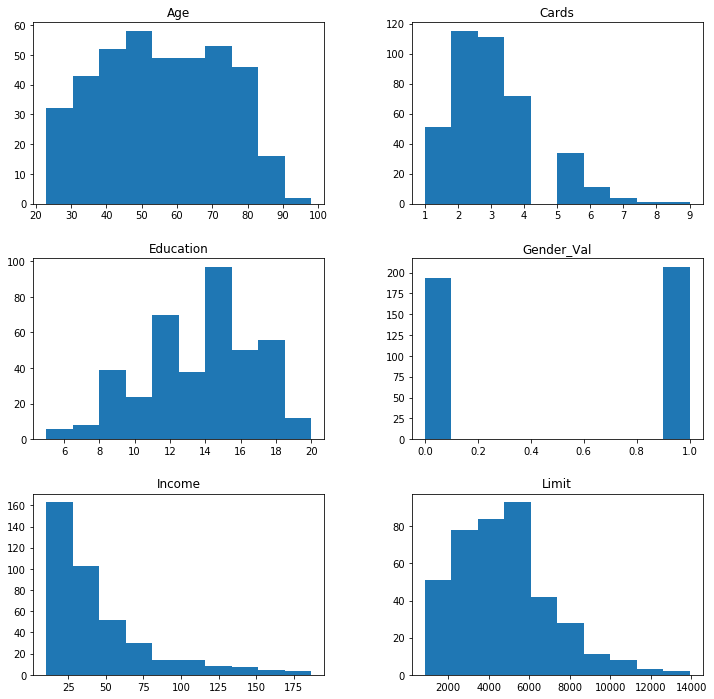

In [40]:
#graph each independent variable!
credit_predict_features.hist(figsize=(12,12), grid=False)

- From what I see, the independent variable Age does not seem to be a multimodal distribution. It looks more like a unimodal. 

- the independent variable Cards seems to be multimodal. 

- Education is also multimodal. 

- Gender_val is not multimodal. I believe Gender_Val is a bimodal distribution.

- Income is a multimodal distrubition.

- Limit is also a multimodal distrubution. 

In [48]:
# Determine how many labels there are in the dependent variable.
labels = []
for row in range(len(credit_predict_target)):
     if credit_predict_target['Rating_Label'][row] not in labels:
         labels.append(credit_predict_target['Rating_Label'][row])
total_labels = len(labels)

In [53]:
print(f'There are {total_labels} labels in the dependent variable "Rating_Label"')

There are 4 labels in the dependent variable "Rating_Label"


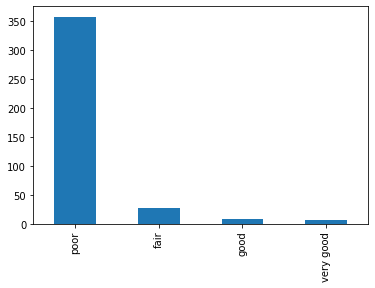

In [55]:
# Is this a balanced classification problem? If yes, why? If no, why not?
credit_predict_target.loc[:,'Rating_Label'].value_counts().plot.bar()

This is not a balanced classification problem because as you can see, the label poor has about 350 while fair,